Importamos las librerias necesarias

In [118]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

import numpy as np
import seaborn as sns

# Punto 1 

Vamos a comenzar leyendo el csv con la libreria pandas, creando una lista con los nombres de las columnas para añadirselas al csv

In [2]:
df_csv = pd.read_csv("covtype.data", header = None)

fila = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
        'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
        'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
        'Horizontal_Distance_To_Fire_Points']
soil_types = []
wilderness_area = []

for i in range(1, 41):
    col_name = f'Soil_Type{i}'
    fila.append(col_name)
    soil_types.append(col_name)


for i in range(1, 5):
    col_name = f'Wilderness_Area{i}'
    wilderness_area.append(col_name)
    fila.append(col_name)


fila.append("Cover_Type")

In [3]:
df_csv.columns = fila

In [4]:
df_csv

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


El conjunto de filas soil_type y wilderness_area, contiene valores binarios, es decir, 1 o 0, por lo que vamos a junatralas en una sola ponien do un 1 en el caso de que en la fila haya minimo un 1 o un 0 si no lo hay.

In [5]:
df_csv['Soil_Type'] = df_csv[soil_types].sum(axis=1)

df_csv['Wilderness_Area'] = df_csv[wilderness_area].sum(axis=1)

# elimina las columnas de Soil
df_csv = df_csv.drop(columns=soil_types)

# elimina las columnas de Wilderness
df_csv = df_csv.drop(columns=wilderness_area)

# printeamos
df_csv

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Soil_Type,Wilderness_Area
0,2596,51,3,258,0,510,221,232,148,6279,5,2,0
1,2590,56,2,212,-6,390,220,235,151,6225,5,2,0
2,2804,139,9,268,65,3180,234,238,135,6121,2,2,0
3,2785,155,18,242,118,3090,238,238,122,6211,2,2,0
4,2595,45,2,153,-1,391,220,234,150,6172,5,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,3,2,0
581008,2391,152,19,67,12,95,240,237,119,845,3,2,0
581009,2386,159,17,60,7,90,236,241,130,854,3,2,0
581010,2384,170,15,60,5,90,230,245,143,864,3,2,0


In [6]:
df_csv_2 = df_csv.copy()

In [7]:
target = 'Cover_Type'
features = [x for x in df_csv_2.columns if x!=target]
features

['Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'Soil_Type',
 'Wilderness_Area']

In [24]:
X =df_csv_2[features]
y=df_csv_2[target]

dt = DecisionTreeClassifier(random_state=100)
dt.fit(X, y)
importances = pd.DataFrame(dt.feature_importances_, index= features, columns=["Importancia"])

In [27]:
importances_sorted = importances.sort_values(by=importances.columns[0], ascending=False)


In [28]:
importances_sorted.head(10)

,Importancia
Elevation,0.333645
Horizontal_Distance_To_Roadways,0.172719
Horizontal_Distance_To_Fire_Points,0.167789
Horizontal_Distance_To_Hydrology,0.076967
Vertical_Distance_To_Hydrology,0.062058
Hillshade_Noon,0.040770
Hillshade_9am,0.037236
Aspect,0.034680
Hillshade_3pm,0.028467
Slope,0.024197


In [43]:
importances_sorted["imp_acum"] = importances_sorted["Importancia"].cumsum()
importances_sorted

,Importancia,imp_acum
Elevation,0.333645,0.333645
Horizontal_Distance_To_Roadways,0.172719,0.506364
Horizontal_Distance_To_Fire_Points,0.167789,0.674154
Horizontal_Distance_To_Hydrology,0.076967,0.751120
Vertical_Distance_To_Hydrology,0.062058,0.813178
Hillshade_Noon,0.040770,0.853948
Hillshade_9am,0.037236,0.891185
Aspect,0.034680,0.925864
Hillshade_3pm,0.028467,0.954331
Slope,0.024197,0.978528


In [44]:
non_importances = list(importances_sorted.loc[importances_sorted['imp_acum']>0.95].index) 
importances_sorted.loc[importances_sorted['imp_acum']<=0.95] 

['Hillshade_3pm', 'Slope', 'Wilderness_Area', 'Soil_Type']                                     Importancia  imp_acum
Elevation                              0.333645  0.333645
Horizontal_Distance_To_Roadways        0.172719  0.506364
Horizontal_Distance_To_Fire_Points     0.167789  0.674154
Horizontal_Distance_To_Hydrology       0.076967  0.751120
Vertical_Distance_To_Hydrology         0.062058  0.813178
Hillshade_Noon                         0.040770  0.853948
Hillshade_9am                          0.037236  0.891185
Aspect                                 0.034680  0.925864
Hillshade_3pm                          0.028467  0.954331
Slope                                  0.024197  0.978528
Wilderness_Area                        0.021472  1.000000
Soil_Type                              0.000000  1.000000


In [45]:
df_csv_reduced = df_csv.drop(labels=non_importances, axis = "columns")

In [46]:
df_csv_reduced

,Elevation,Aspect,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Fire_Points,Cover_Type
0,2596,51,258,0,510,221,232,6279,5
1,2590,56,212,-6,390,220,235,6225,5
2,2804,139,268,65,3180,234,238,6121,2
3,2785,155,242,118,3090,238,238,6211,2
4,2595,45,153,-1,391,220,234,6172,5
...,...,...,...,...,...,...,...,...,...
581007,2396,153,85,17,108,240,237,837,3
581008,2391,152,67,12,95,240,237,845,3
581009,2386,159,60,7,90,236,241,854,3
581010,2384,170,60,5,90,230,245,864,3


# Punto 2

In [ ]:
df_csv_reduced_2 = df_csv_reduced.copy()



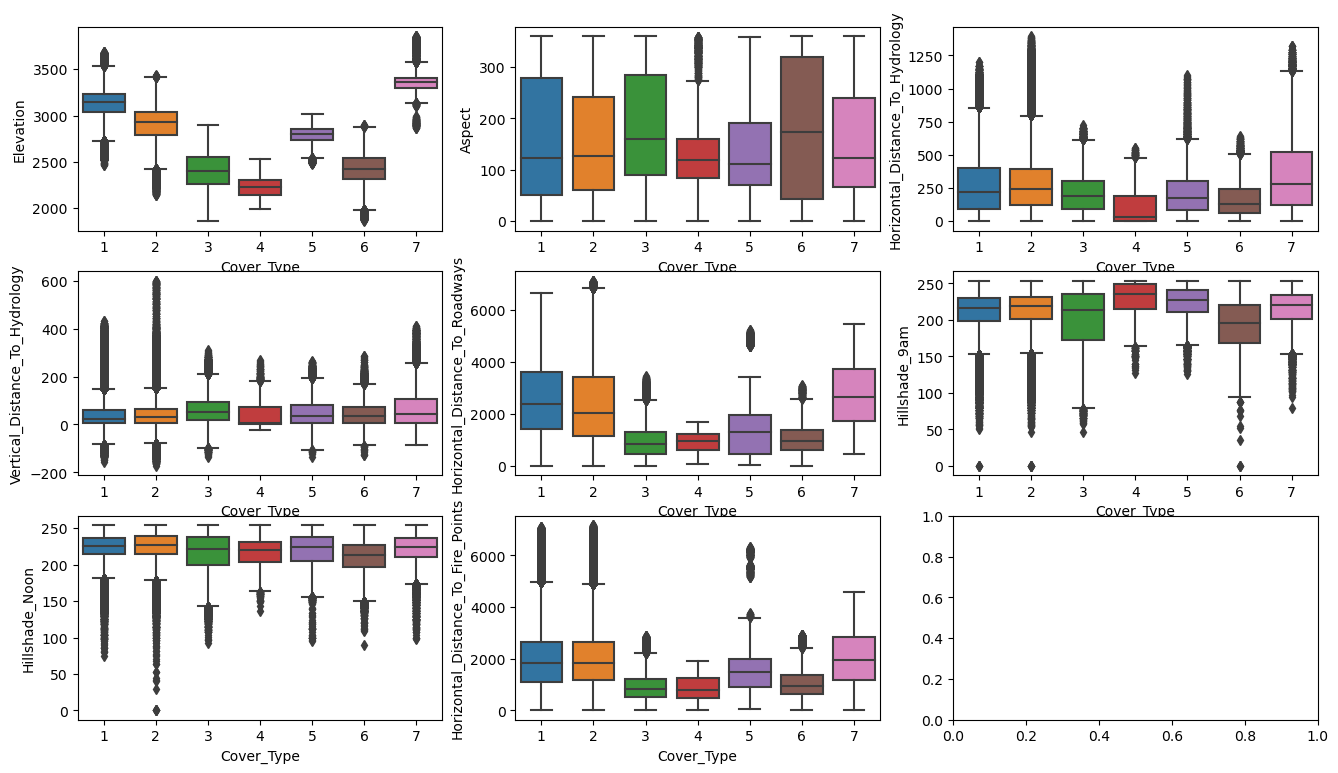

In [86]:
fig, axes = plt.subplots(3, 3, figsize=(16,9))
numero = 0
numero2 = 0
sns.boxplot(y="Elevation", x= "Cover_Type", data=df_csv_reduced_2,  orient='v' , ax=axes[0, 0])
sns.boxplot(y="Aspect", x= "Cover_Type", data=df_csv_reduced_2,  orient='v' , ax=axes[0, 1])
sns.boxplot(y="Horizontal_Distance_To_Hydrology", x= "Cover_Type", data=df_csv_reduced_2,  orient='v' , ax=axes[0, 2])
sns.boxplot(y="Vertical_Distance_To_Hydrology", x= "Cover_Type", data=df_csv_reduced_2,  orient='v' , ax=axes[1, 0])
sns.boxplot(y="Horizontal_Distance_To_Roadways", x= "Cover_Type", data=df_csv_reduced_2,  orient='v' , ax=axes[1, 1])
sns.boxplot(y="Hillshade_9am", x= "Cover_Type", data=df_csv_reduced_2,  orient='v' , ax=axes[1, 2])
sns.boxplot(y="Hillshade_Noon", x= "Cover_Type", data=df_csv_reduced_2,  orient='v' , ax=axes[2, 0])
sns.boxplot(y="Horizontal_Distance_To_Fire_Points", x= "Cover_Type", data=df_csv_reduced_2,  orient='v' , ax=axes[2, 1])

    
plt.show()

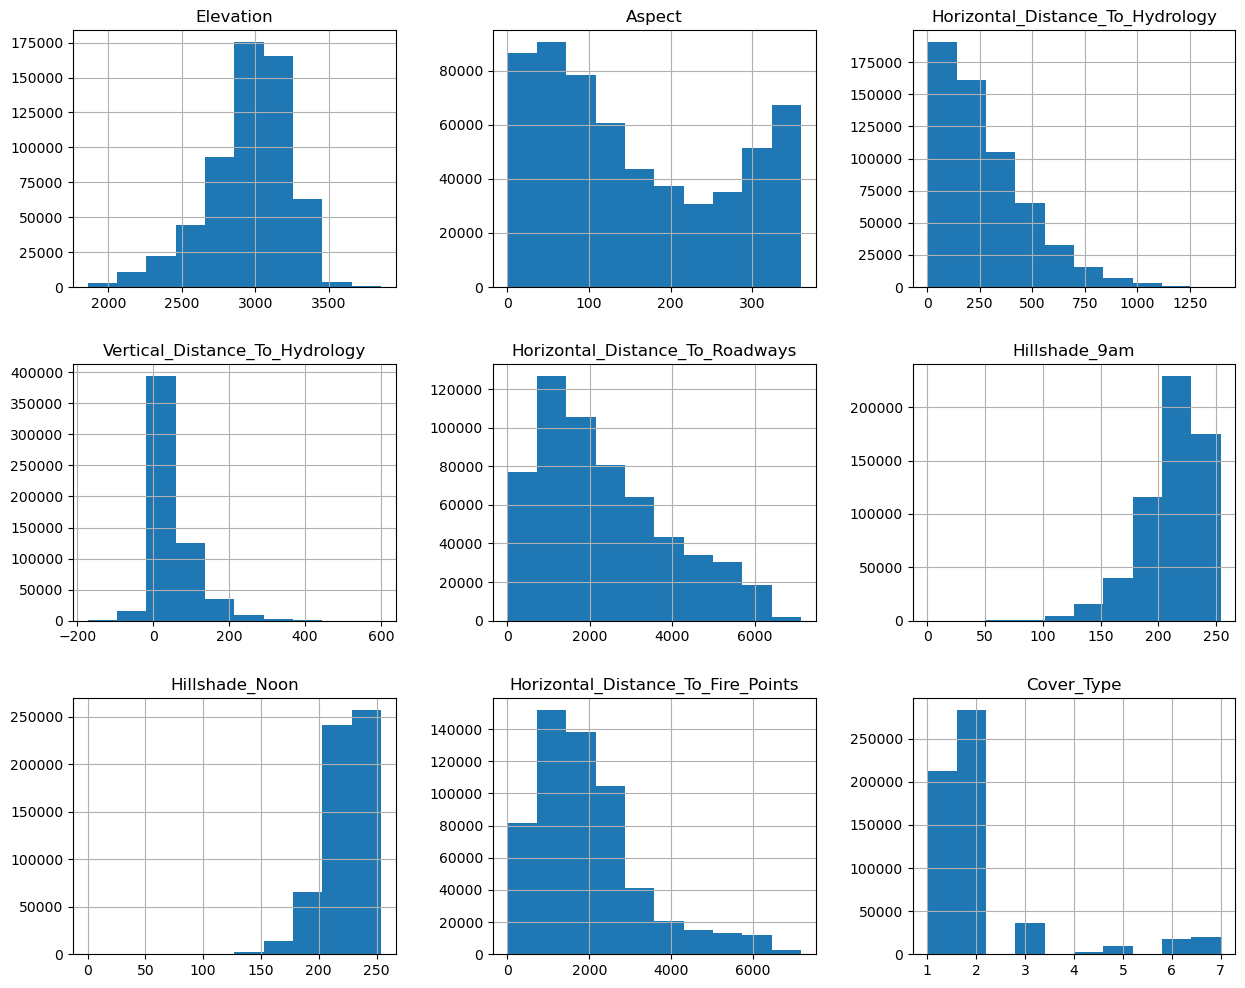

In [47]:
# Generar histogramas para cada variable
df_csv_reduced_2.hist(figsize=(15,12))
plt.show()


In [100]:

# Normalizar variables de entrada a una escala de 0 a 1
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled)
X_scaled_df.columns = ["Elevation","Aspect","Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology","Horizontal_Distance_To_Roadways","Hillshade_9am","Hillshade_Noon","Horizontal_Distance_To_Fire_Points"]
X_scaled_df["Cover_Type"]=y
X_scaled_df

,Elevation,Aspect,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Fire_Points,Cover_Type
0,0.368684,0.141667,0.184681,0.223514,0.071659,0.870079,0.913386,0.875366,5
1,0.365683,0.155556,0.151754,0.215762,0.054798,0.866142,0.925197,0.867838,5
2,0.472736,0.386111,0.191840,0.307494,0.446817,0.921260,0.937008,0.853339,2
3,0.463232,0.430556,0.173228,0.375969,0.434172,0.937008,0.937008,0.865886,2
4,0.368184,0.125000,0.109520,0.222222,0.054939,0.866142,0.921260,0.860449,5
...,...,...,...,...,...,...,...,...,...
581007,0.268634,0.425000,0.060845,0.245478,0.015175,0.944882,0.933071,0.116688,3
581008,0.266133,0.422222,0.047960,0.239018,0.013348,0.944882,0.933071,0.117803,3
581009,0.263632,0.441667,0.042949,0.232558,0.012646,0.929134,0.948819,0.119058,3
581010,0.262631,0.472222,0.042949,0.229974,0.012646,0.905512,0.964567,0.120452,3


In [101]:
X_scaled_df.describe()

,Elevation,Aspect,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Fire_Points,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,0.550458,0.432380,0.192862,0.283487,0.330216,0.835221,0.879208,0.276076,2.051471
std,0.140062,0.310871,0.152147,0.075317,0.219089,0.105393,0.077830,0.184608,1.396504
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.475238,0.161111,0.077309,0.232558,0.155403,0.779528,0.838583,0.142758,1.000000
50%,0.568784,0.352778,0.156049,0.262274,0.280596,0.858268,0.889764,0.238394,2.000000
75%,0.652326,0.722222,0.274875,0.312661,0.467613,0.909449,0.933071,0.355500,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


# Punto 3

In [102]:
nuevo_df = X_scaled_df.copy()

In [103]:
X = nuevo_df.drop(['Cover_Type'], axis=1)
y = nuevo_df['Cover_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)


In [104]:
# Importar el módulo que corresponde al algoritmo
from sklearn.linear_model import LogisticRegression

# Asignar el algoritmo que vamos a aplicar 
log_r = LogisticRegression(max_iter=1000, random_state=100)
log_r

LogisticRegression(max_iter=1000, random_state=100)

In [105]:
log_r.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=100)

In [113]:
# Predecir la variable objetivo en el conjunto de prueba
y_pred = log_r.predict(X_test)

# Calcular las diferentes métricas para evaluar el modelo
accuracy = round(accuracy_score(y_test, y_pred),2)
f1 = round(f1_score(y_test, y_pred, average='weighted'),2)
report = classification_report(y_test, y_pred, zero_division=0)
matrix = confusion_matrix(y_test, y_pred)

# Imprimir las métricas
print(f'Accuracy: {accuracy}')

Accuracy: 0.69


In [114]:
print(f'F1-score: {f1}')

F1-score: 0.67


In [115]:
print(f'Classification report:\n{report}')

Classification report:
              precision    recall  f1-score   support

           1       0.67      0.70      0.69     42446
           2       0.72      0.78      0.75     56592
           3       0.59      0.70      0.64      7133
           4       0.53      0.07      0.12       571
           5       0.00      0.00      0.00      1847
           6       0.31      0.07      0.11      3456
           7       0.57      0.21      0.31      4158

    accuracy                           0.69    116203
   macro avg       0.48      0.36      0.37    116203
weighted avg       0.67      0.69      0.67    116203



Confusion matrix:
[[29642 12152     4     0     0     0   648]
 [11244 44397   867     0     0    71    13]
 [    0  1692  4976    35     0   430     0]
 [    0     4   522    39     0     6     0]
 [    3  1841     3     0     0     0     0]
 [    0  1101  2123     0     0   232     0]
 [ 3207    72     0     0     0     0   879]]


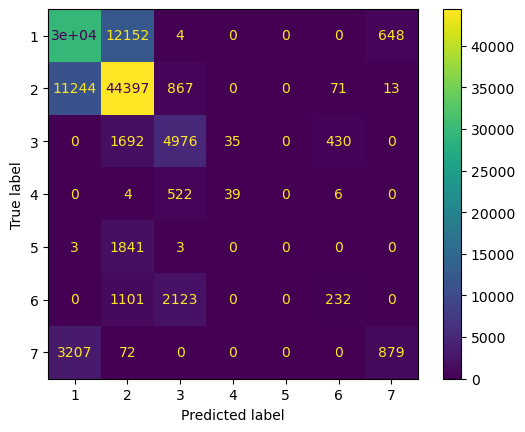

In [119]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
                               display_labels=log_r.classes_)
disp.plot()
plt.show()

# Punto 4